## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore') #Used when finding the outliers

In [7]:
path="/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Hotel_booking/Copy of Hotel Bookings.csv"
df=pd.read_csv(path)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 1. Length of stay Box plot

In [12]:
#getting length of stay
df['length_of_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['length_of_stay'].tail()

119385    7
119386    7
119387    7
119388    7
119389    9
Name: length_of_stay, dtype: int64

Text(0, 0.5, 'Type of Hotel')

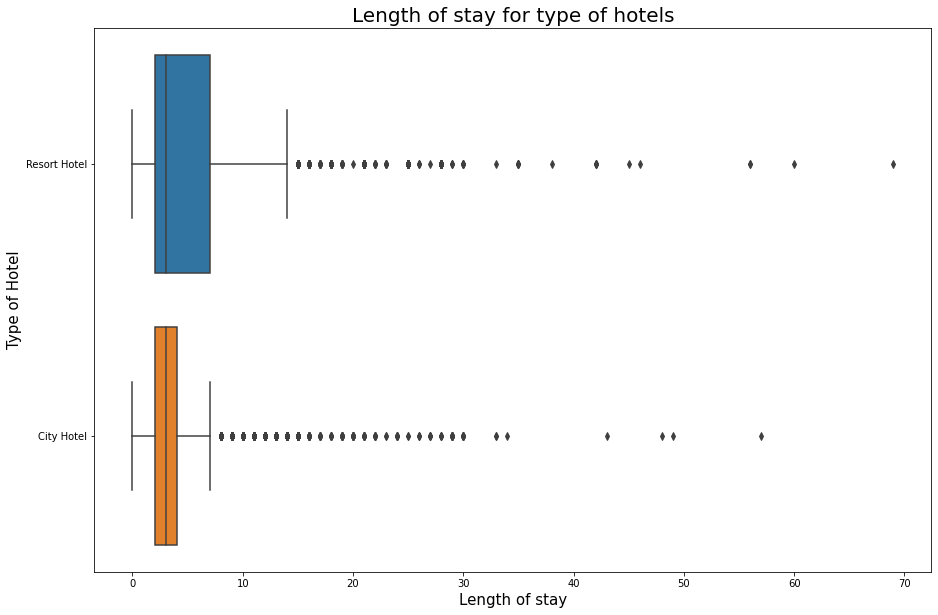

In [32]:
#Box plot for length of stay accoridng to Hotel type
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="length_of_stay", y="hotel", data=df, orient="h")
ax.set_title('Length of stay for type of hotels',fontsize = 20)
ax.set_xlabel("Length of stay", fontsize = 15)
ax.set_ylabel("Type of Hotel", fontsize = 15)




*   If we ignore the outliers, the maximum length of stay is more in resort type as resort is mostly used for vacation purpose.
*   Median of both the hotels are approximately equal.





#2. ADR for each hotel type according to year (Line Plot)

In [42]:
adr_year = df.groupby(['arrival_date_year','hotel'])['adr'].mean().unstack()
adr_year

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,85.856915,89.353417
2016,103.483683,87.730762
2017,117.501864,108.660217


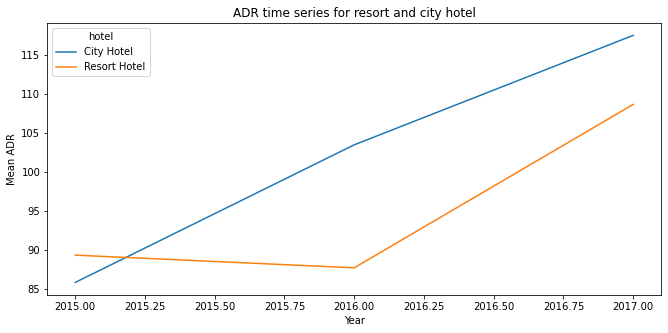

In [102]:
#line plot of adr year wise
adr_year.plot()

plt.title('ADR time series for resort and city hotel')
plt.ylabel('Mean ADR')
plt.xlabel('Year')
plt.rcParams['figure.figsize'] = (11, 5)



*   The mean ADR for city hotel increased with almost constant rate from 2015 to 2016.
*   The mean ADR for resort decreased from 2015 to 2016 but then increased from 2016 to 2017



#3. Total previous cancellation and not cancellation

In [77]:
number_of_cancel=df.groupby(['hotel'])['previous_cancellations'].sum()
number_of_cancel

hotel
City Hotel      6326
Resort Hotel    4075
Name: previous_cancellations, dtype: int64

In [80]:
number_of_notcancel=df.groupby(['hotel'])['previous_bookings_not_canceled'].sum()
number_of_notcancel

hotel
City Hotel      10501
Resort Hotel     5867
Name: previous_bookings_not_canceled, dtype: int64

Text(0, 0.5, 'Total previous cancelations')

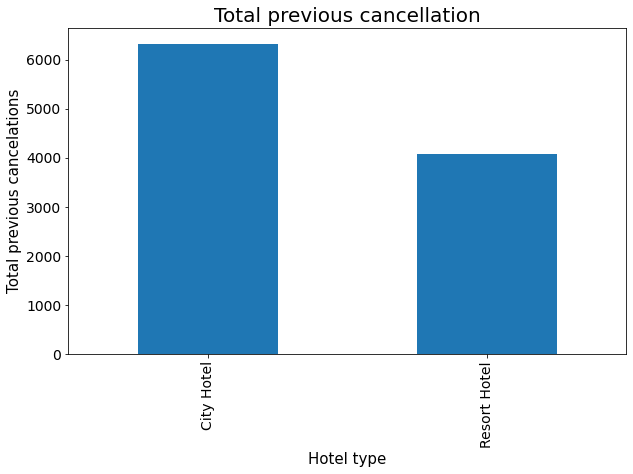

In [85]:
# Create the figure object 
cancel_number= number_of_cancel.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
cancel_number.set_title("Total previous cancellation", fontsize = 20)

# Set x and y-labels
cancel_number.set_xlabel("Hotel type", fontsize = 15)
cancel_number.set_ylabel("Total previous cancellations", fontsize = 15)



*   Total number of previously cancelled booking is more in city hotel than a resort hotel.



Text(0, 0.5, 'Sum of not cancelled previously')

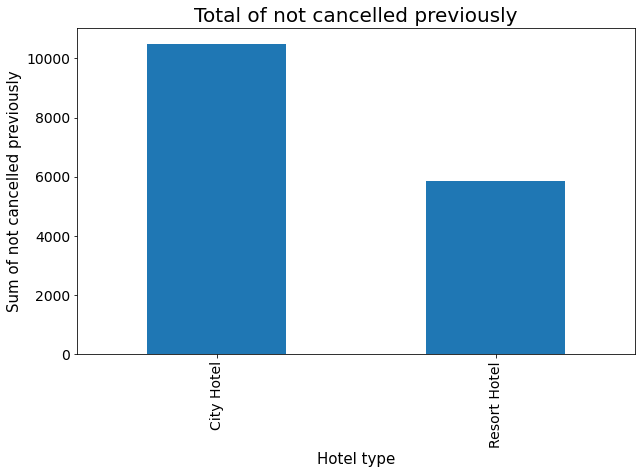

In [86]:
# Create the figure object 
notcancel_number= number_of_notcancel.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
notcancel_number.set_title("Total of not cancelled previously", fontsize = 20)

# Set x and y-labels
notcancel_number.set_xlabel("Hotel type", fontsize = 15)
notcancel_number.set_ylabel("Sum of not cancelled previously", fontsize = 15)

* Total number of previously not cancelled booking is more in city hotel than a resort hotel.
* The city hotel is used more frequently compared to resort hotel thus the canceled and not canceled booking will be more in city hotel.

#4. Total special request in each type of market segment

In [110]:
total_special_request=df.groupby(['market_segment'])['total_of_special_requests'].sum()
total_special_request



market_segment
Aviation            27
Complementary      693
Corporate         1217
Direct            7262
Groups            1727
Offline TA/TO     6491
Online TA        50795
Undefined            3
Name: total_of_special_requests, dtype: int64

Text(0, 0.5, 'Total special requests')

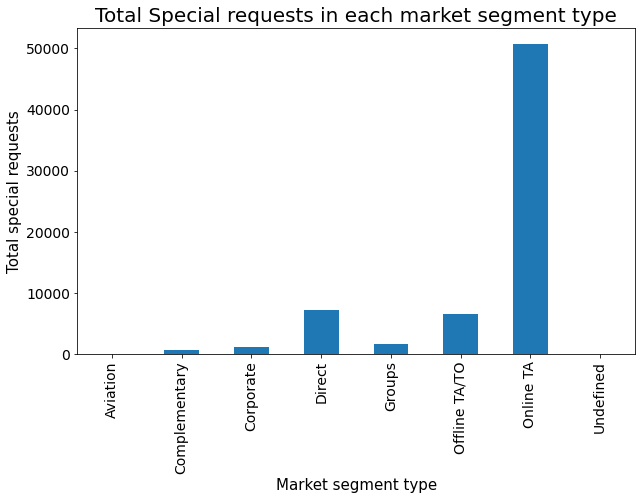

In [112]:
# Create the figure object 
histogram_special_request=total_special_request.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
histogram_special_request.set_title("Total Special requests in each market segment type", fontsize = 20)

# Set x and y-labels
histogram_special_request.set_xlabel("Market segment type", fontsize = 15)
histogram_special_request.set_ylabel("Total special requests", fontsize = 15)



*   The city hotel is used frequently and city hotel can be used for multipurpose such as for staying, for conferences, for parties etc. So the total special requests in city hotel is more than resort.



#5.Sum of parking space according to type of booking


In [95]:
total_parking=df.groupby(['customer_type'])['required_car_parking_spaces'].sum()
total_parking

customer_type
Contract            135
Group                51
Transient          6440
Transient-Party     838
Name: required_car_parking_spaces, dtype: int64

Text(0, 0.5, 'Total of Parking space required')

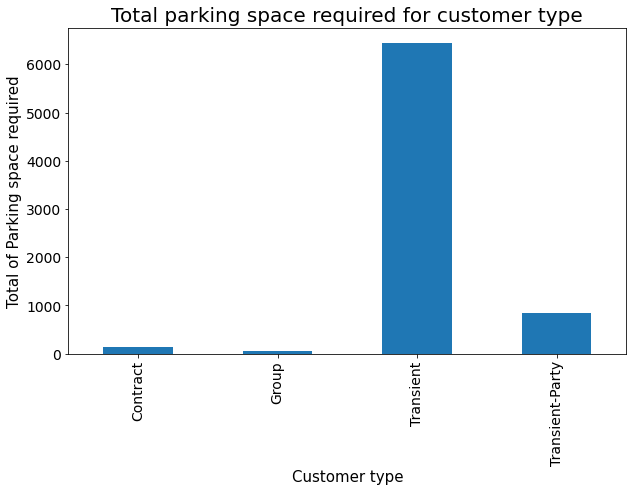

In [93]:
# Create the figure object 
bar_parking=total_parking.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
bar_parking.set_title("Total parking space required for customer type", fontsize = 20)

# Set x and y-labels
bar_parking.set_xlabel("Customer type", fontsize = 15)
bar_parking.set_ylabel("Total of Parking space required", fontsize = 15)



*   When customer type is Transient that means the stay is more few days so it is possible that customer bringing his/her own vehicle that's why the parking space required it high for Transient
*   In contract and group booking customer will probably take a hired vehicle form hotel or from somewhere else that's why they do not need parking space.



#6. Total cancellations for each hotel type

In [119]:
x=2
print(f"x is {x}")

x is 2


In [128]:
total_cancellation=df.groupby(['hotel'])['is_canceled'].sum()
print(f"total_cancellation=\n{total_cancellation}")
total_bookings=df['hotel'].value_counts()
print(f"total_bookings=\n{total_bookings}")

#percentage of total_cancellation for both the bookings 
percentage_of_cancellation=np.round(total_cancellation*100/total_bookings,2)
print("--------------------------")
print(percentage_of_cancellation)

total_cancellation=
hotel
City Hotel      33102
Resort Hotel    11122
Name: is_canceled, dtype: int64
total_bookings=
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
--------------------------
hotel
City Hotel      41.73
Resort Hotel    27.76
dtype: float64


Text(0, 0.5, 'Total cancellation')

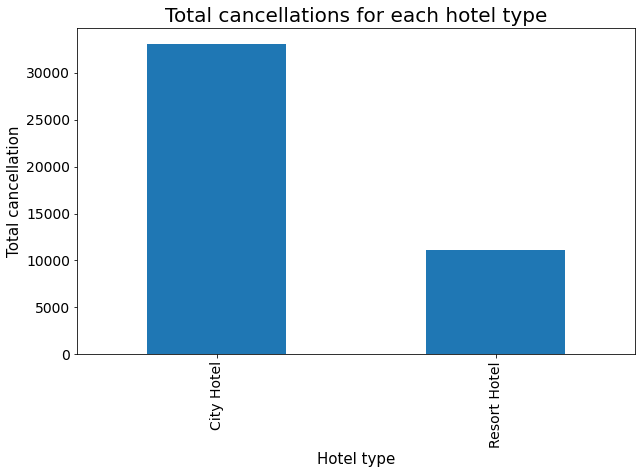

In [97]:
# Create the figure object 
bar_cancellation=total_cancellation.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
bar_cancellation.set_title("Total cancellations for each hotel type", fontsize = 20)

# Set x and y-labels
bar_cancellation.set_xlabel("Hotel type", fontsize = 15)
bar_cancellation.set_ylabel("Total cancellation", fontsize = 15)

*   The total booking for city hotel is more compared to resort and so the total cancellation is also large for city hotels.



#Practice

In [109]:
data=df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean().unstack()
data

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,NaN,88.918920,111.370903
August,105.922888,142.893595,164.248370
December,74.079243,86.370246,NaN
February,NaN,70.102269,76.824005
January,NaN,64.767656,73.777264
July,97.834316,125.484536,143.037770
June,NaN,106.977315,125.757599
March,NaN,79.069326,82.242660
May,NaN,96.399286,119.365364


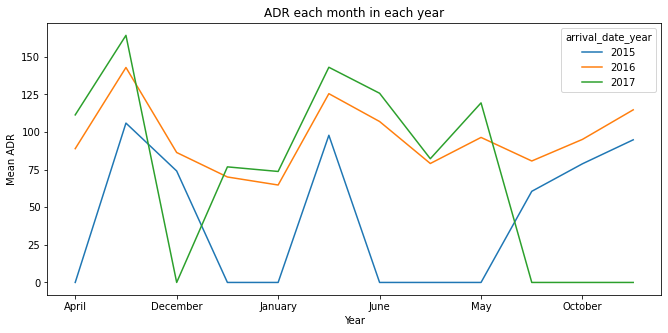

In [106]:
#line plot of adr year wise
data.fillna(0).plot()

plt.title('ADR each month in each year')
plt.ylabel('Mean ADR')
plt.xlabel('Year')
plt.rcParams['figure.figsize'] = (11, 5)